In [46]:
import numpy as np
# from scipy.stats import poisson
# from scipy.optimize import curve_fit
import utils as ut
import matplotlib.pyplot as plt
import seaborn as sns
# Formato para matplotlib
from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format='retina'
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['figure.dpi'] = 120
rcParams['legend.fontsize'] = 10
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'
rcParams['axes.xmargin'] = 0
rcParams['axes.grid'] = True


config_code_dict = {
    "a": {"fotomultiplicador": False, "laser power": False, "laser light": False},
    "b": {"fotomultiplicador": True, "laser power": False, "laser light": False},
    "c": {"fotomultiplicador": True, "laser power": True, "laser light": False},
    "d": {"fotomultiplicador": True, "laser power": True, "laser light": True},
}

## Respuesta a un Fotón

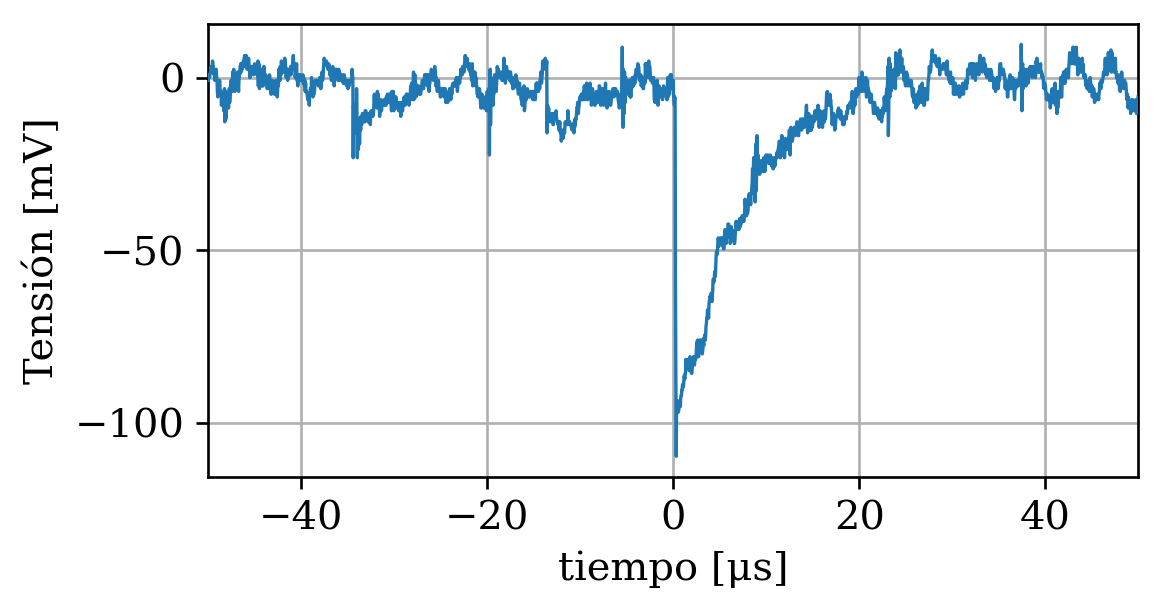

In [45]:
# Datos Guardados en Misc:
tiempo, channel = np.load(f"misc/20mV_10microseg_foton.npy")  # s, V
v_res = 20e-3*10/(2**8)  # V
t_res = 10e-6*10/2500  # s

x = tiempo*1e6  # μs
dx = t_res/2*1e6  # μs
y = channel*1e3  # mV
dy = v_res/2*1e3  # mV

fig, ax = plt.subplots(1, 1, figsize=(5, 2.5))
ax.patch.set_alpha(0)
# plt.errorbar(x, y, xerr=dx, yerr=dy,
#              fmt=".-", lw=0.5, ms=4, mec="k", mew=0.5,
#              ecolor="k", capsize=2, alpha=0.5, zorder=10)
plt.plot(x, y, "-", lw=1,
        #  ms=4, mec="k", mew=0.25,
         alpha=1, zorder=10)
plt.xlabel(r"tiempo [μs]")
plt.ylabel(r"Tensión [mV]")
plt.show()

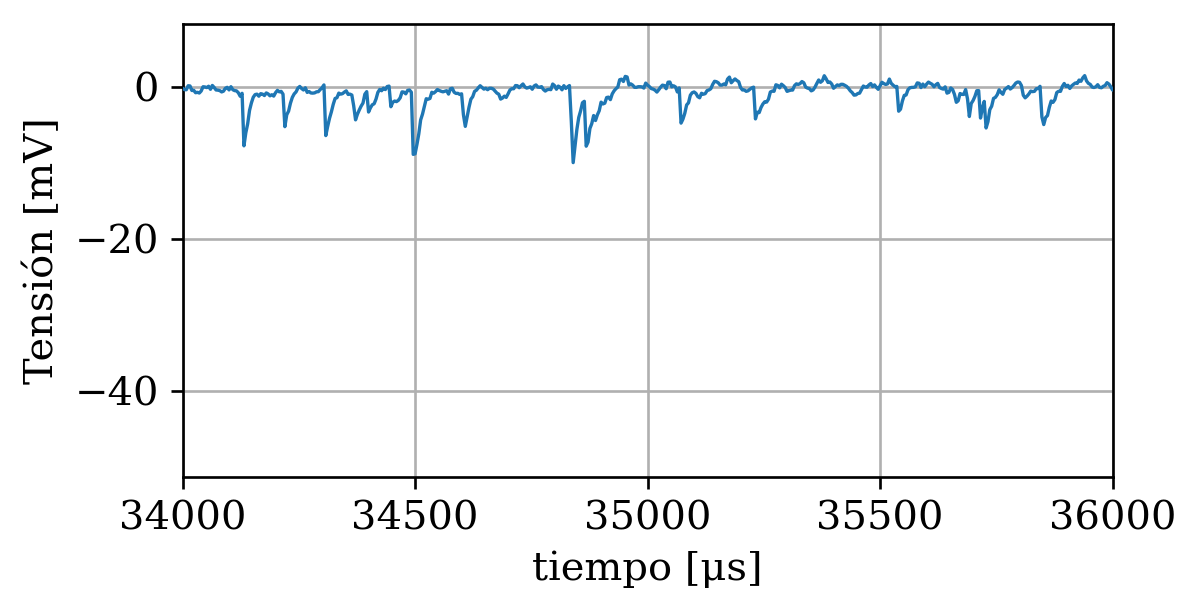

In [74]:
# Leer una tanda guardada:
config = "c"  # Estado del instrumental al medir
tension = 1050  # Tensión en la fuente del fotomultiplicador
angulo = 230  # Ángulo relativo entre polarizadores a la salida del láser
freq = 250e3  # Hz
max_val = 50e-3  # V
min_val = -150e-3  # V
modo = "sample"  # Modo del osciloscopio: "fpeaks" para find peaks y "sample" para sampleo
tiempo, channel = np.load(f"DAQ_10s_{max_val*1e3:.0f}_{min_val*1e3:.0f}/"
                           + f"{modo}_f{freq*1e-3:.0f}k_a{angulo}_t{tension}_{config}.npy")  # s, V
v_res = 1.05*(max_val - min_val)/(2**16)  # V
t_res = 1/250e3  # s

x = tiempo*1e6  # μs
dx = t_res/2*1e6  # μs
y = channel*1e3  # mV
dy = v_res/2*1e3  # mV

fig, ax = plt.subplots(1, 1, figsize=(5, 2.5))
ax.patch.set_alpha(0)
# plt.errorbar(x, y, xerr=dx, yerr=dy,
#              fmt=".-", lw=0.5, ms=4, mec="k", mew=0.5,
#              ecolor="k", capsize=2, alpha=0.5, zorder=10)
plt.plot(x, y, "-", lw=1,
        #  ms=4, mec="k", mew=0.25,
         alpha=1, zorder=10)
i = 17
plt.xlim(i*2000, (i+1)*2000)
plt.xlabel(r"tiempo [μs]")
plt.ylabel(r"Tensión [mV]")
plt.show()